In [1]:
!pip install yfinance
!pip install yahoofinancials
import pandas as pd 
import yfinance as yf
from yahoofinancials import YahooFinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 11.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [11]:
df = yf.download('USDT-USD', start='2015-01-01', end='2022-12-31', progress=False)
df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,1.010870,1.013270,0.996515,1.008180,1.008180,358188000
1,2017-11-10,1.006500,1.024230,0.995486,1.006010,1.006010,756446016
2,2017-11-11,1.005980,1.026210,0.995799,1.008990,1.008990,746227968
3,2017-11-12,1.006020,1.105910,0.967601,1.012470,1.012470,1466060032
4,2017-11-13,1.004480,1.029290,0.975103,1.009350,1.009350,767884032
...,...,...,...,...,...,...,...
1873,2022-12-26,0.999934,1.000020,0.999894,0.999995,0.999995,14986560291
1874,2022-12-27,0.999964,1.000019,0.999828,0.999850,0.999850,18554435182
1875,2022-12-28,0.999855,0.999921,0.999652,0.999686,0.999686,21161758512
1876,2022-12-29,0.999679,0.999838,0.999599,0.999735,0.999735,18567214596


In [12]:
df = df[['Date','Close']]
df = df.rename(columns={'Date':'ds','Close':'y'})
df.tail(10)

,ds,y
1868,2022-12-21,1.000077
1869,2022-12-22,1.000011
1870,2022-12-23,0.999981
1871,2022-12-24,0.999992
1872,2022-12-25,0.999943
1873,2022-12-26,0.999995
1874,2022-12-27,0.999850
1875,2022-12-28,0.999686
1876,2022-12-29,0.999735
1877,2022-12-30,0.999659


In [13]:
df = df[:-1]
df

,ds,y
0,2017-11-09,1.008180
1,2017-11-10,1.006010
2,2017-11-11,1.008990
3,2017-11-12,1.012470
4,2017-11-13,1.009350
...,...,...
1872,2022-12-25,0.999943
1873,2022-12-26,0.999995
1874,2022-12-27,0.999850
1875,2022-12-28,0.999686


In [14]:
!pip install NeuralProphet
from neuralprophet import NeuralProphet
from matplotlib import pyplot as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
m = NeuralProphet()
m.fit(df, freq='D', epochs=100)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.947% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.947% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: 

Finding best initial lr:   0%|          | 0/232 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,0.050102,0.059903,0.578900,0.0,0
1,0.047449,0.057028,0.534465,0.0,1
2,0.043292,0.052491,0.467958,0.0,2
3,0.036696,0.045068,0.363775,0.0,3
4,0.027286,0.034265,0.225853,0.0,4
...,...,...,...,...,...
95,0.002710,0.004701,0.003868,0.0,95
96,0.002706,0.004677,0.003854,0.0,96
97,0.002706,0.004675,0.003847,0.0,97
98,0.002707,0.004730,0.003847,0.0,98


In [16]:
future = m.make_future_dataframe(df, periods=120)
forecast = m.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.947% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.947% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.167% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.167% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 59it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2022-12-30,None,1.003466,0.999681,0.003718,0.000067
1,2022-12-31,None,1.003611,0.999679,0.003702,0.000230
2,2023-01-01,None,1.003421,0.999677,0.003672,0.000072
3,2023-01-02,None,1.003129,0.999675,0.003629,-0.000175
4,2023-01-03,None,1.003050,0.999673,0.003574,-0.000197


In [17]:
future.tail()

,ds,y
115,2023-04-24,None
116,2023-04-25,None
117,2023-04-26,None
118,2023-04-27,None
119,2023-04-28,None


WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


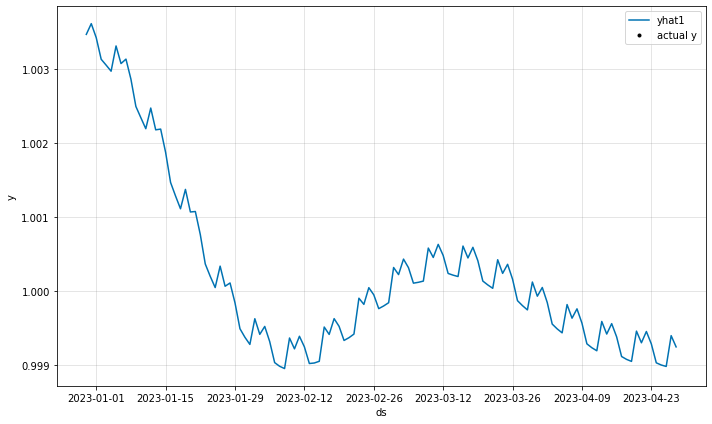

In [18]:
plot1 = m.plot(forecast)

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


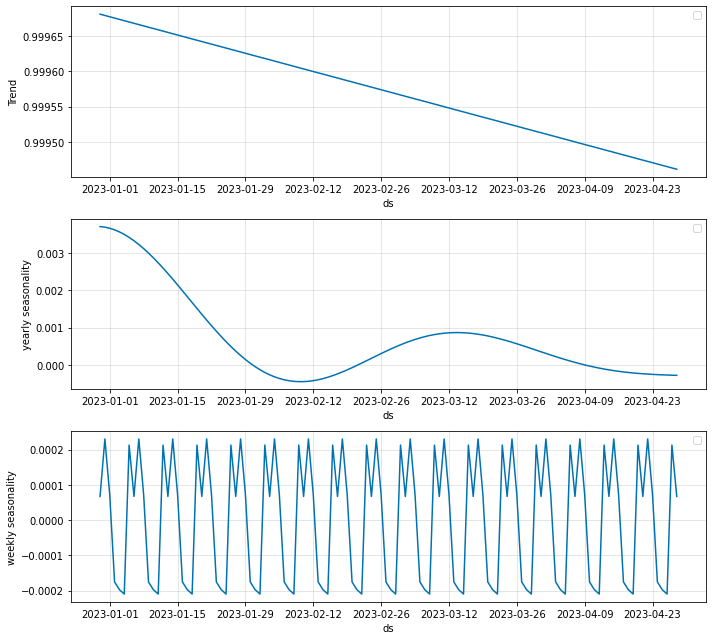

In [19]:
plot2 = m.plot_components(forecast)